### Preprocessing :

Preprocessing involves transforming raw text data into an
understandable format. Real-world data is very often incomplete,
inconsistent, and filled with a lot of noise and is likely to contain many
errors. Preprocessing is a proven method of resolving such issues. Data
preprocessing prepares raw text data for further processing

#### Converting Text data to lower case

In [8]:
# Converting the text data to lower case

text=['This is introduction to NLP','It is likely to be useful, to people ',\
      'Machine learning is the new electrcity','There would be less hype around AI and more action goingforward',
      'python is the best tool!','R is good langauage', 'I like this book','I want more books like this']

# Convert the list to Data frame

import pandas as pd

df = pd.DataFrame({'tweets' : text})
print(df)

                                              tweets
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [9]:
"TUSHAR".lower()

'tushar'

In [10]:
df['tweets'] = df['tweets'].apply(lambda x:" ".join(x.lower() for x in x.split()))

#### Removing punctuation

The simplest way to do this is by using the regex and replace() function in
Python.

In [29]:
text=['This is introduction to NLP','It is likely to be useful, to people ',
      'Machine learning is the new electrcity','There would be less hype around AI and more action goingforward',
      'python is the best tool!','R is good langauage','I like this book','I want more books like this']

df = pd.DataFrame({'tweets': text})
print(df)

                                              tweets
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [23]:
import re

s = 'I. Like. This book!'

s1 = re.sub(r'[^\w\s]',"",s)

In [24]:
s1

'I Like This book'

In [30]:
df['tweets'] = df['tweets'].apply(lambda x:" ".join(re.sub(r'[^\w\s]', "",x) for x in x.split() ))
# df['tweets'] = df['tweets'].str.replace(r'[^\w\s]', "")

In [31]:
print(df['tweets'])

0                          This is introduction to NLP
1                  It is likely to be useful to people
2               Machine learning is the new electrcity
3    There would be less hype around AI and more ac...
4                              python is the best tool
5                                  R is good langauage
6                                     I like this book
7                          I want more books like this
Name: tweets, dtype: object


#### Removing Stop words

Stop words are very common words that carry no meaning or less meaning compared
to other keywords. If we remove the words that are less commonly used,
we can focus on the important keywords instead. Say, for example, in the
context of a search engine, if your search query is “How to develop chatbot
using python,” if the search engine tries to find web pages that contained the
terms “how,” “to,” “develop,” “chatbot,” “using,” “python,” the search engine
is going to find a lot more pages that contain the terms “how” and “to” than
pages that contain information about developing chatbot because the terms
“how” and “to” are so commonly used in the English language. So, if we
remove such terms, the search engine can actually focus on retrieving pages
that contain the keywords: “develop,” “chatbot,” “python” – which would
more closely bring up pages that are of real interest. Similarly we can remove
more common words and rare words as well.

In [1]:
text=['This is introduction to NLP','It is likely to be useful, to people ',
      'Machine learning is the new electrcity','There would be less hype around AI and more action goingforward',
      'python is the best tool!','R is good langauage','I like this book','I want more books like this']

import pandas as pd

df = pd.DataFrame({'tweets':text})

In [2]:
print(df)

                                              tweets
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [8]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words("english")

df['tweets'] = df['tweets'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [9]:
print(df['tweets'])

0                                This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action goingfo...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: tweets, dtype: object


#### Text Standardization

Most of the text data is in the form of either customer reviews, blogs, or tweets,
where there is a high chance of people using short words and abbreviations to
represent the same meaning. This may help the downstream process to easily
understand and resolve the semantics of the text.

In [36]:
lookup_dict = {'nlp':'natural language processing',
               'ur':'your','wbu':'What about you','lol':'laugh out loud'}

import re

# Create a custom function for text standardization

def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]',"",word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)
        else:
            new_words.append(word)
    new_text = " ".join(new_words)
    return new_text
# run text_std

text_std("I like nlp it's ur choice wbu lol")

'I like natural language processing its your choice What about you laugh out loud'

#### correcting spelling:

Most of the text data is in the form of either customer reviews, blogs, or
tweets, where there is a high chance of people using short words and
making typo errors. This will help us in reducing multiple copies of words,
which represents the same meaning. For example, “proccessing” and
“processing” will be treated as different words even if they are used in the
same sense.

In [38]:
text=['Introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity', 
      'R is good langauage','I like this book','I want more books like this']

df = pd.DataFrame({'tweets': text})
print(df)

                                   tweets
0                     Introduction to NLP
1   It is likely to be useful, to people 
2  Machine learning is the new electrcity
3                     R is good langauage
4                        I like this book
5             I want more books like this


In [45]:
from textblob import TextBlob

df['tweets'].apply(lambda x: str(TextBlob(x).correct()))

0                        Introduction to NLP
1      It is likely to be useful, to people 
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: tweets, dtype: object

#### Tokenizing

Tokenization refers to
splitting text into minimal meaningful units. There is a sentence tokenizer
and word tokenizer. We will see a word tokenizer in this recipe, which is
a mandatory step in text preprocessing for any kind of analysis. There are
many libraries to perform tokenization like NLTK, SpaCy, and TextBlob.
Here are a few ways to achieve it

In [51]:
text=['Introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity', 
      'R is good langauage','I like this book','I want more books like this']
df = pd.DataFrame({'tweets': text})
print(df)

                                   tweets
0                     Introduction to NLP
1   It is likely to be useful, to people 
2  Machine learning is the new electrcity
3                     R is good langauage
4                        I like this book
5             I want more books like this


In [55]:
TextBlob(df['tweets'][3]).words

WordList(['R', 'is', 'good', 'langauage'])

In [56]:
my_string = "Cat is a good animal"

nltk.word_tokenize(my_string)

['Cat', 'is', 'a', 'good', 'animal']

In [57]:
my_string.split()

['Cat', 'is', 'a', 'good', 'animal']

In [59]:
TextBlob(my_string).words

WordList(['Cat', 'is', 'a', 'good', 'animal'])

#### Stemming:
Stemming is a process of
extracting a root word. For example, “fish,” “fishes,” and “fishing” are
stemmed into fish.

In [63]:
text = ['I like Fishing', 'I eat fish', 'there are many fishes in the sea']

df = pd.DataFrame({'tweets':text})

st = nltk.stem.PorterStemmer()

df['tweets'][:5].apply(lambda x:" ".join([st.stem(words) for words in x.split()]))

0                       i like fish
1                        i eat fish
2    there are mani fish in the sea
Name: tweets, dtype: object

#### Lemmitization:

Lemmatization is a process of
extracting a root word by considering the vocabulary. For example, “good,”
“better,” or “best” is lemmatized into good

In [68]:
text = ['I like Fishing', 'I eat fish', 'there are many fishes in the sea','leaves and leaf']
df = pd.DataFrame({'tweets':text})

from textblob import Word

# df['tweets'].apply(lambda x: " ".join([Word(word).lemmatize for word in x.split()]))
df['tweets'] = df['tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [70]:
df['tweets']

0                    I like Fishing
1                        I eat fish
2    there are many fish in the sea
3                     leaf and leaf
Name: tweets, dtype: object

#### Exploring the text data

In [71]:
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\koolt\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [72]:
len(wt_sentences)

1138

In [73]:
len(wt_words)

102457

In [76]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [77]:
sorted_freq_dist = sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)
sorted_freq_dist

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab',
 'doesn',
 'after',
 'Firebird',
 'new',
 'work',
 'browser',
 'if',
 'be',
 '0',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'as',
 'file',
 'URL',
 'download',
 'crashes',
 'I',
 'no',
 'text',
 'are',
 'or',
 'up',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 '/',
 'firefox',
 'manager',
 '+',
 'using',
 'it',
 'Mozilla',
 'default',
 'error',
 'all',
 'an',
 'clicking',
 's',
 'windows',
 'search',
 'folder',
 ']',
 'Phoenix',
 '1',
 'at',
 'icon',
 'Manager',
 'by',
 'this',
 'site',
 'can',
 'files',
 'Page',
 'fails',
 'causes',
 'use',
 'close',
 '[',
 'opening',
 'Toolbar',
 'Add',
 'has',
 'Bookmark',
 'right',
 'display',
 'down',
 'that',
 'theme',
 'box',
 'Download',
 '9',
 'The',
 'pages',
 'firebird',
 'only',
 'ur

In [78]:
# Lets consider the words greater than 3

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k) > 3])

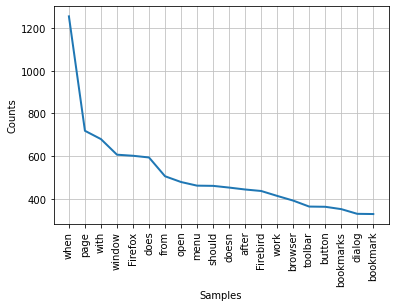

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
frequency_dict = nltk.FreqDist(large_words)
frequency_dict.plot(20, cumulative=False)

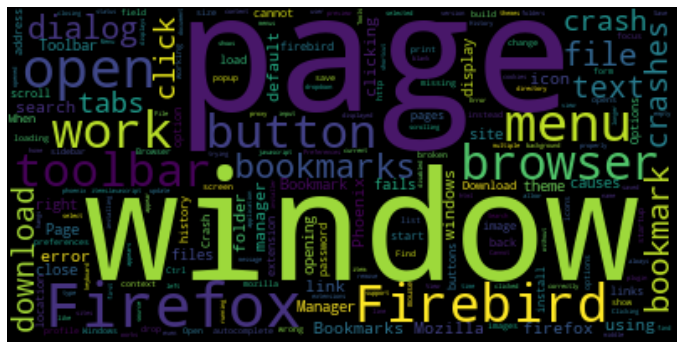

In [116]:
# Build the word cloud
from wordcloud import WordCloud

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

# ploting wcloud 

import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:
wt_words1 = []
for w in wt_words:
    if w not in stop:
        wt_words1.append(w)

In [98]:
len(wt_words1)

76154

In [110]:
freq_dist1 = FreqDist(wt_words1)

In [111]:
freq_dist1

FreqDist({'.': 2428, '"': 1971, "'": 1507, '-': 1372, '(': 770, 'page': 719, ')': 645, 'window': 607, 'Firefox': 602, 'open': 479, ...})

In [101]:
sorted_freq_dist1 = sorted(freq_dist1,key=freq_dist1.__getitem__, reverse = True)

large_words1 = dict([k,v] for k,v in freq_dist1.items() if len(k)>3)

In [103]:
len(large_words1)

7111

In [113]:
frequency_dist = nltk.FreqDist(large_words1)

In [114]:
frequency_dist

FreqDist({'page': 719, 'window': 607, 'Firefox': 602, 'open': 479, 'menu': 462, 'Firebird': 437, 'work': 414, 'browser': 392, 'toolbar': 364, 'button': 363, ...})

In [117]:
wtcloud1 = WordCloud.generate_from_frequencies(frequency_dist)

plt.figure(figsize=(12,9))
plt.imshow(wtcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: generate_from_frequencies() missing 1 required positional argument: 'frequencies'

#### Building the text pipeline

You want to build an end-to-end text preprocessing pipeline. Whenever
you want to do preprocessing for any NLP application, you can directly
plug in data to this pipeline function and get the required clean text data as
the output

In [3]:
# Read and create the text data

tweet_sample = "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success(@PrepareToWin)"

In [22]:
# Process the text

def ProcessRow(row):
    import re
    import nltk
    from textblob import TextBlob
    from textblob import Word
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.util import ngrams
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    st = PorterStemmer()
    tweet = row
    # lower case
    tweet.lower()
    # Remove unicode string like "/u002c" "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r"", tweet) 
    tweet = re.sub(r'[^\x00-\x7f]',r"",tweet)
    # Covert any url to URL
    tweet = re.sub(r'((www\.[^\s]+) | (https?://[^\s]+))',' URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    # Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', " ", tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)',"")
    tweet = tweet.replace(':(',"")
    #remove numbers
    tweet = "".join([i for i in tweet if not i.isdigit()])
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    # lemma
    tweet = " ".join([Word(word).lemmatize() for word in tweet.split()])
    # stemmer
    tweet = " ".join([st.stem(word) for word in tweet.split()])
    # Removing emoticons
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:',"", tweet)
    # trim
    tweet = tweet.strip('\'"')
    row = tweet
    return row

In [23]:
ProcessRow(tweet_sample)

'how to take control of your debt url advic for famili financi success at_us'